In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
db_filename = 'dinofunworld.db'
#conn = sqlite3.connect("./readonly/{0}".format(db_filename)) 
conn = sqlite3.connect(db_filename) 
c = conn.cursor()
# db_filename = 'dinofunworld.db'
# conn = sqlite3.connect("./readonly/{0}".format(db_filename))
# c = conn.cursor()

In [4]:
#In order to have options concerning the graphs presented, the park's administrators also ask you 
# to provide a 50-sample moving average window with the average computed with exponential weighting 
# (i.e., an exponentially weighted moving average) over the same 'Atmosfear' attendance data.

In [5]:
'''Returns the split of sequence string and returns a list of 1/0 based 
on if the user is present near atmosFear or not'''
def getAttendance(sequenceString):
    totalSequences = sequenceString.split('-')
    return list(map(lambda y: 1 if y==atmosFearAttractionId else 0, totalSequences))

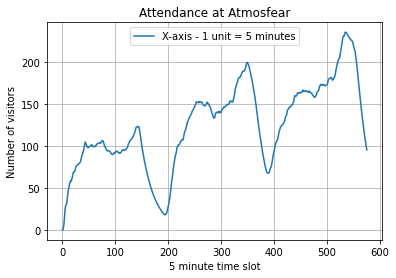

In [14]:
rideName = 'Atmosfear'
span=50
atmosFearFromDB = c.execute("SELECT AttractionID from attraction WHERE Name='{0}'".format(rideName)).fetchall()[0][0]

# return type from db will be of type int
atmosFearAttractionId = str(atmosFearFromDB)

sequences = c.execute("SELECT Sequence FROM Sequences").fetchall()
sequenceDataFrame = pd.DataFrame.from_records(sequences, columns = ['Sequences'])
atmosFearForEveryVisitor = list(map(lambda x: getAttendance(x), sequenceDataFrame['Sequences']))
summedAtmosFearVisitorsValue = [0]*len(atmosFearForEveryVisitor[0])

for atmosFearAVisitor in atmosFearForEveryVisitor:
    summedAtmosFearVisitorsValue = [sum(x) for x in zip(summedAtmosFearVisitorsValue, atmosFearAVisitor)]

plotDataFrame = pd.DataFrame({'visitorCount': summedAtmosFearVisitorsValue})
df_exp = plotDataFrame.ewm(span=span).mean()
plt.plot(df_exp)

plt.title('Attendance at Atmosfear')
plt.xlabel('5 minute time slot')
plt.ylabel('Number of visitors')
plt.grid(True)

#adding the legend
plt.legend(['X-axis - 1 unit = 5 minutes'], loc=9)

plt.show()